In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
CMAP = 'Reds'

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
try:
  data = pd.read_csv('/content/gdrive/Shareddrives/4995 Applied ML Project/data/cervical_cancer_data.csv')
except:
  data = pd.read_csv('/content/gdrive/MyDrive/4995 Applied ML Project/data/cervical_cancer_data.csv')

In [4]:
data.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [6]:
data.replace('?',np.nan, inplace = True)

In [7]:
targets = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data_y = data[targets]
data_x = data.iloc[:,:-4]

# FEATURE STATISTICS

In [8]:
data_x.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data_y.describe()

,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000
mean,0.040793,0.086247,0.051282,0.064103
std,0.197925,0.280892,0.220701,0.245078
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


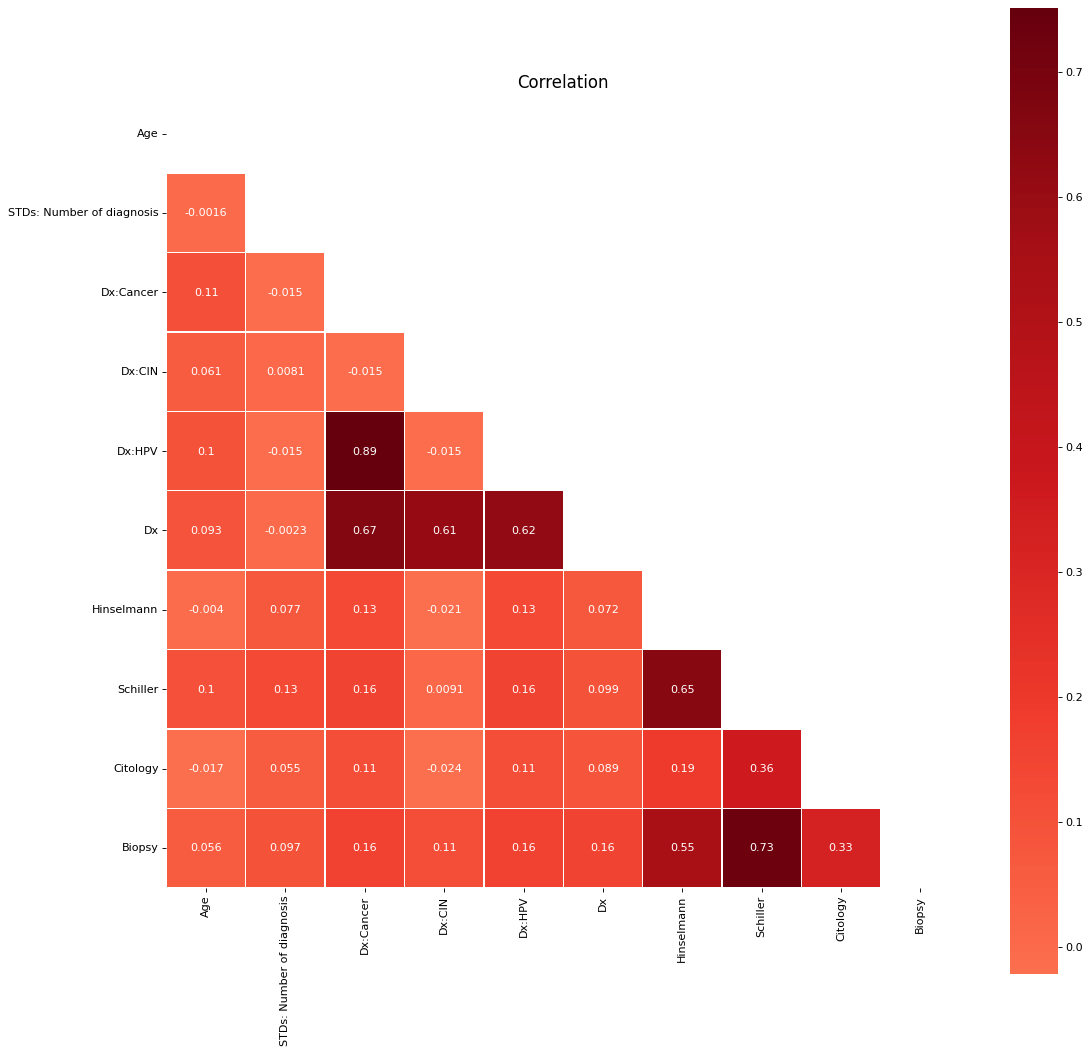

In [10]:
plt.figure(figsize=(16,16),dpi=80)
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap = CMAP, robust=True, center=0, square=True, linewidths=.3, annot=True)
plt.title('Correlation', fontsize=15)
plt.show()

# CLASS DISTRIBUTIONS

There are only 6 patients that had a positive test result for all 4 diagnostic test out of 858 patients

In [11]:
class_dist = pd.DataFrame(columns = ['Test','cancer','healthy'])
class_dist['Test'] = data_y.columns.to_list()
class_dist['cancer'] = [np.count_nonzero(data_y[col]) for col in data_y.columns]
class_dist['healthy'] = data.shape[0] - class_dist['cancer'] 

class_dist = pd.melt(class_dist, id_vars = ['Test'], var_name = 'Diagnosis', value_name = 'Count')

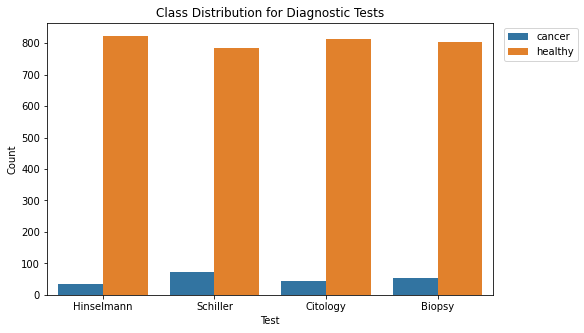

In [12]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x = 'Test', y = 'Count', hue = 'Diagnosis', data = class_dist)
plt.legend(bbox_to_anchor=(1.2, 1), loc = 1)
plt.title('Class Distribution for Diagnostic Tests')
# plt.savefig('figures/class-distribution-all-tests.png', bbox_inches = 'tight')
plt.show()

# MISSING VALUE ANALYSIS

There are huge number of missing values in STD: Time since first and last diagnosis so it makes sense to drop these features. Moreover, there is a clear pattern where there is no information about contraceptives, IUD and any type of STDs. This is probably because the patients were not comfortable disclosing this information. Further analysis is done in later sections to determine which imputation technique will work the best.

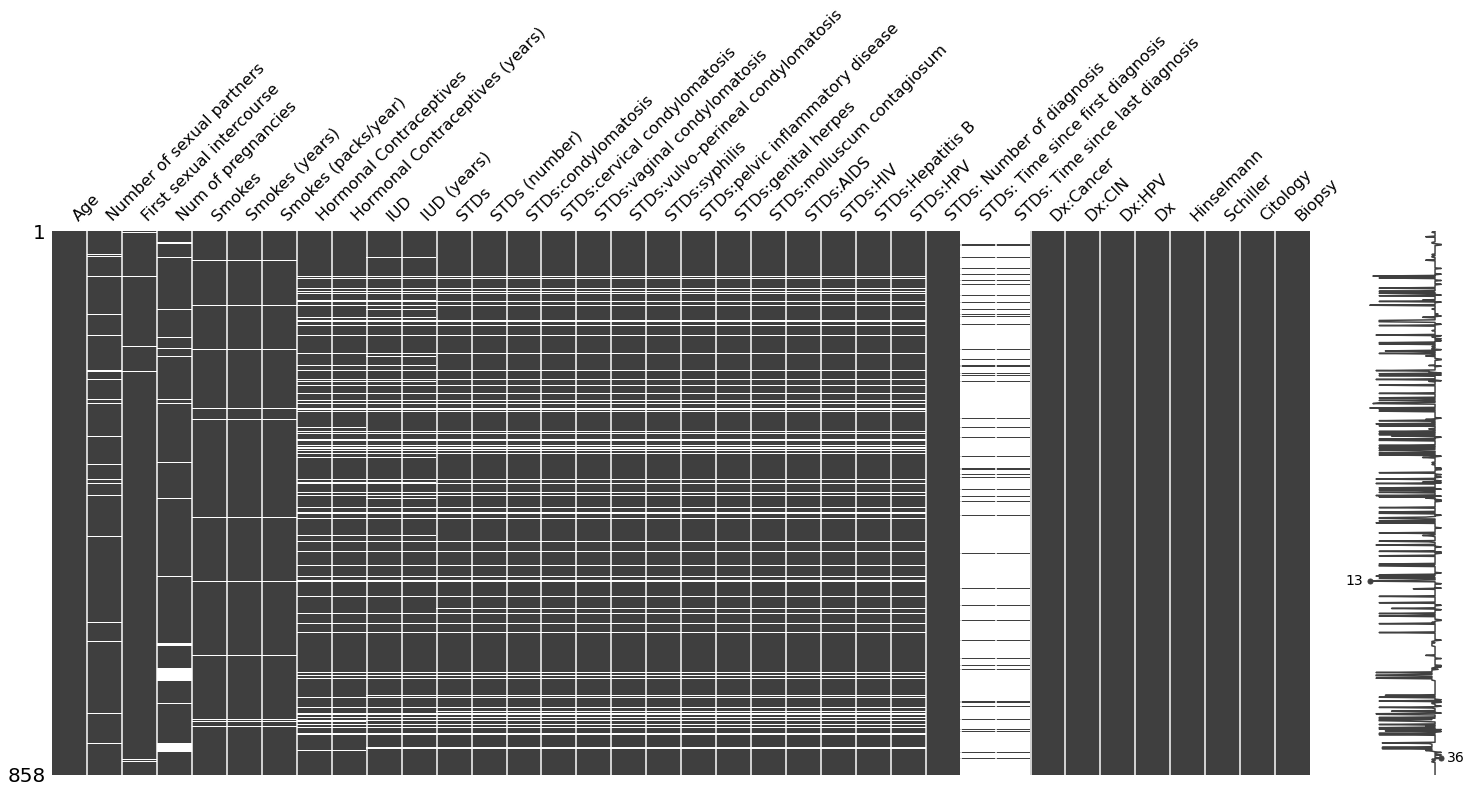

In [13]:
msno.matrix(data)
# plt.savefig('figures/missing-values-plot.png', bbox_inches = 'tight')
plt.show()

In [14]:
data.drop(columns = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace = True)

In [15]:
missing_df = (100*data.isnull().sum()/858).to_frame()
missing_df.columns = ['percentage missing']
missing_df.sort_values(by = 'percentage missing')

,percentage missing
Age,0.000000
Schiller,0.000000
Hinselmann,0.000000
Dx,0.000000
Dx:HPV,0.000000
Dx:CIN,0.000000
Dx:Cancer,0.000000
STDs: Number of diagnosis,0.000000
Citology,0.000000
Biopsy,0.000000


# FEATURE ANALYSIS

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics)
numerical_columns = list(newdf.columns)

non_numeric = []
for c in list(data.columns):
    if c not in numerical_columns:
        non_numeric.append(c)

print('Numerical features = \n{}'.format(numerical_columns))
print('\nCategorical features = \n{}'.format(non_numeric))

Numerical features = 
['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

Categorical features = 
['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV']


## Numerical Features

### Converting appropriate categories to numerical

Above we can see that a few of the supposedly non-numerical categories are actually numerical; they just have been put in the dataset as strings. These categories are Number of sexual partners, First sexual intercourse, Num of pregnancies, STDs: Time since first diagnosis, STDs: Time since last diagnosis. We converted these to numeric values.

In [17]:
data['Number of sexual partners'] = pd.to_numeric(data['Number of sexual partners'], errors='coerce')
data['First sexual intercourse'] = pd.to_numeric(data['First sexual intercourse'], errors='coerce')
data['Num of pregnancies'] = pd.to_numeric(data['Num of pregnancies'], errors='coerce')
data['Smokes (years)'] = pd.to_numeric(data['Smokes (years)'], errors='coerce')
data['Smokes (packs/year)'] = pd.to_numeric(data['Smokes (packs/year)'], errors='coerce')
data['Hormonal Contraceptives (years)'] = pd.to_numeric(data['Hormonal Contraceptives (years)'], errors='coerce')
data['IUD (years)'] = pd.to_numeric(data['IUD (years)'], errors='coerce')
data['STDs (number)'] = pd.to_numeric(data['STDs (number)'], errors='coerce')

In [18]:
numerical_cols = ['Age', \
          'STDs: Number of diagnosis',\
          'Number of sexual partners', \
          'First sexual intercourse', \
          'Num of pregnancies',\
          'Smokes (years)', \
          'Smokes (packs/year)',\
          'Hormonal Contraceptives (years)',\
          'IUD (years)']

### Missing values for numerical features


In [19]:
num_missing = pd.Series(data[numerical_cols].isnull().sum())
percentage_missing = pd.Series(100*data[numerical_cols].isnull().sum()/858) 
frame = {'number missing': num_missing, 'percentage missing': percentage_missing} 
res = pd.DataFrame(frame)   
res.sort_values(by = 'number missing')

,number missing,percentage missing
Age,0,0.000000
STDs: Number of diagnosis,0,0.000000
First sexual intercourse,7,0.815851
Smokes (years),13,1.515152
Smokes (packs/year),13,1.515152
Number of sexual partners,26,3.030303
Num of pregnancies,56,6.526807
Hormonal Contraceptives (years),108,12.587413
IUD (years),117,13.636364


## Correlations

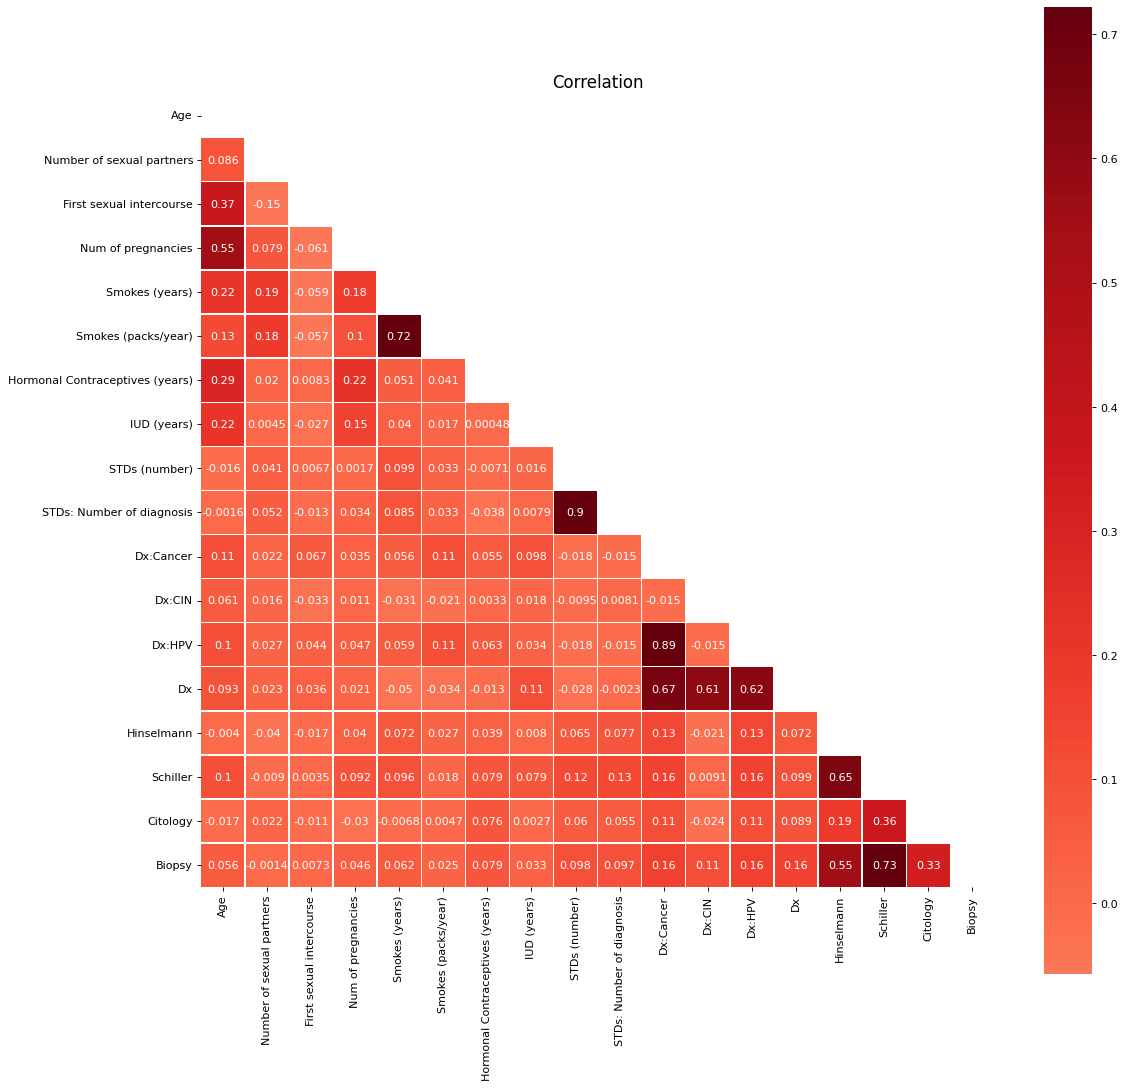

In [20]:
plt.figure(figsize=(16,16),dpi=80)
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap = CMAP, robust=True, center=0, square=True, linewidths=.3, annot=True)
plt.title('Correlation', fontsize=15)
plt.show()

As we can see from the table, columns 'Age' and 'STDs: Number of diagnosis' don't have missing value so we can ignore them here.

### Analyzing relationships for Imputation

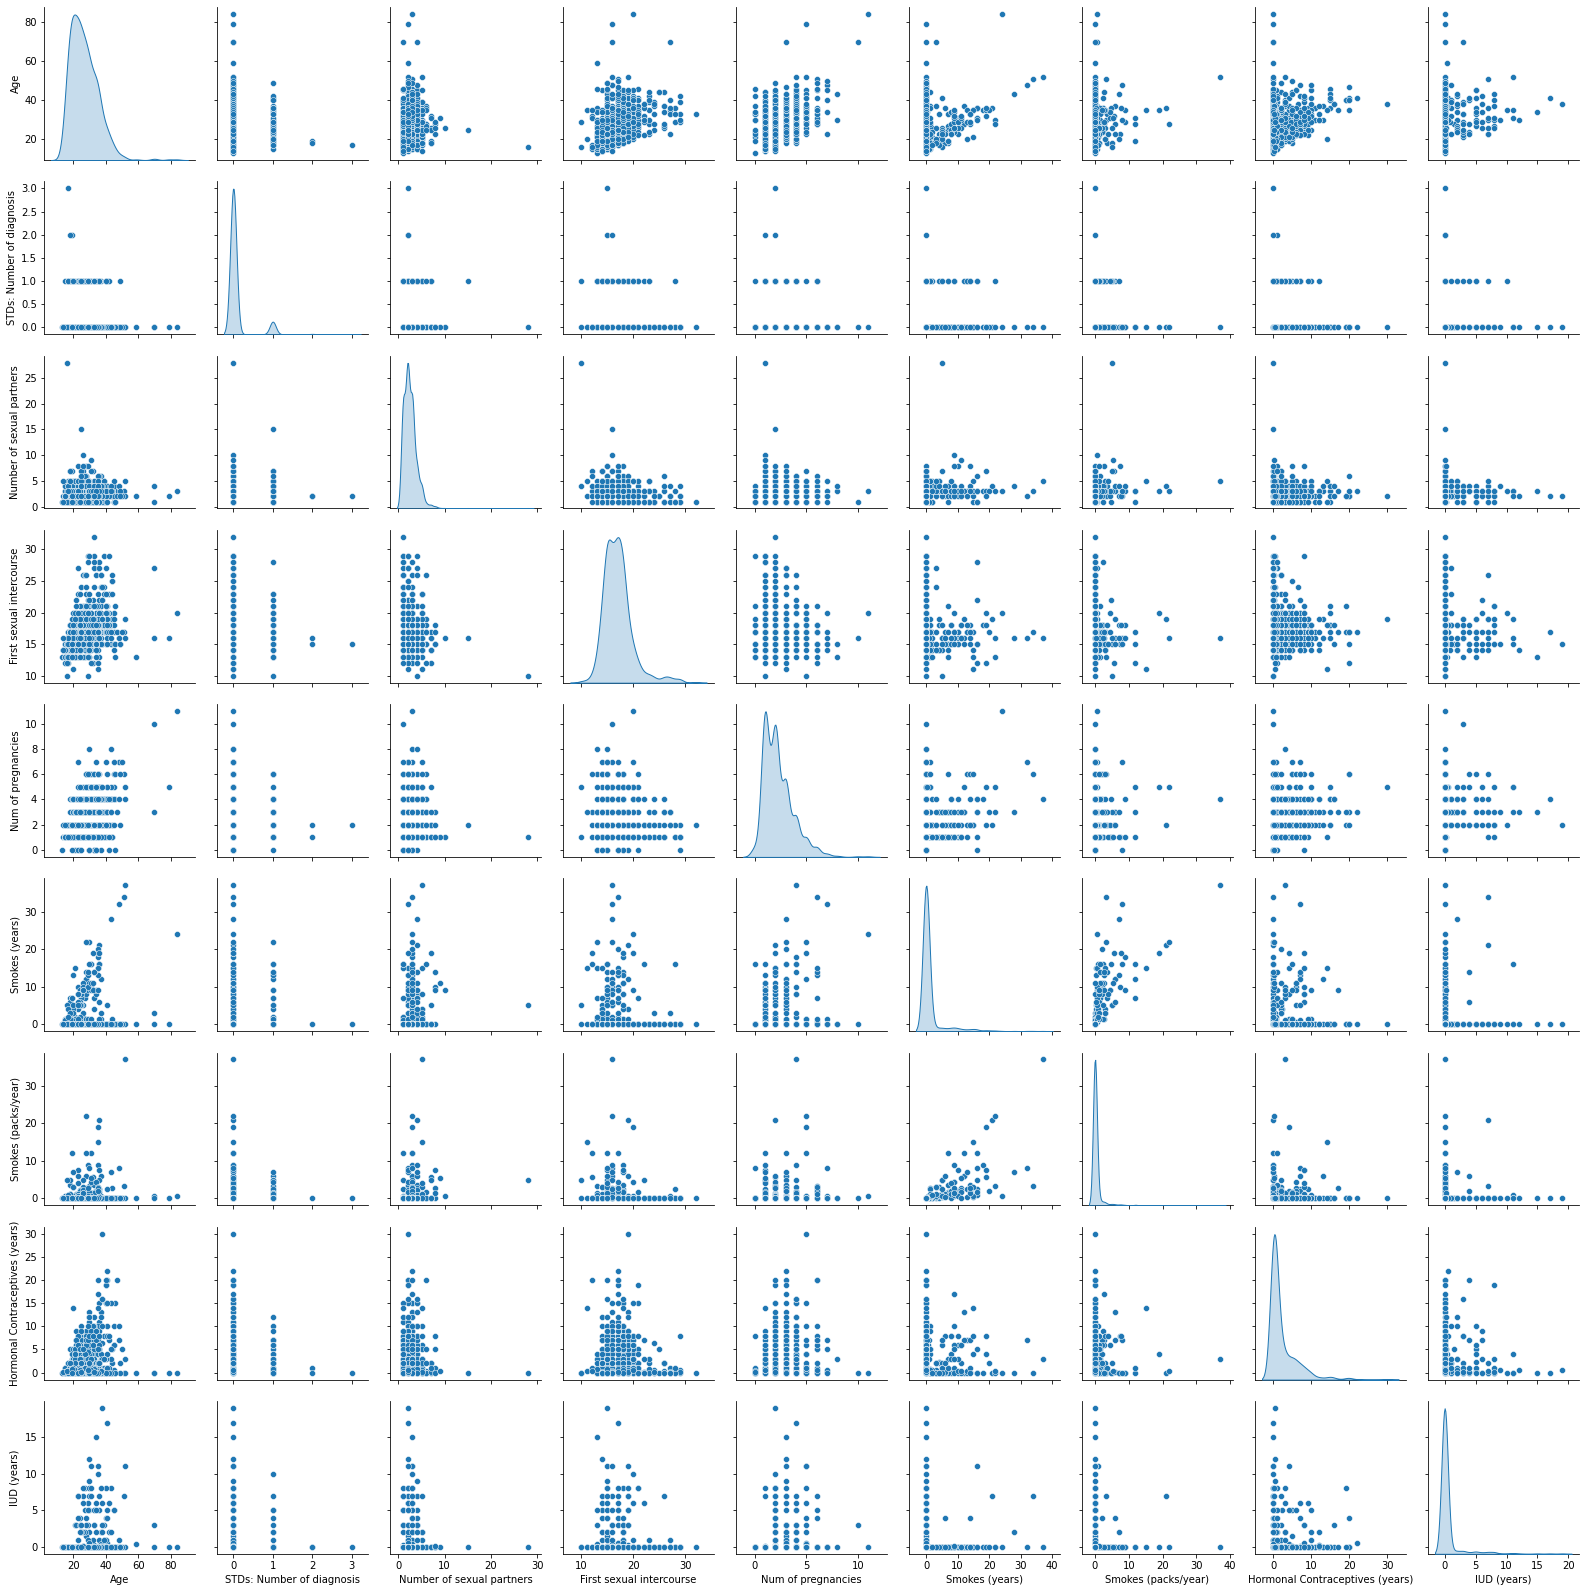

In [21]:
sns.pairplot(data[numerical_cols], diag_kind = 'kde')
plt.show()

In [22]:
std_df = data[['Age','Number of sexual partners']+[x for x in data.columns if 'STDs:' in x]]
std_df = std_df.sort_values(by = 'Number of sexual partners')

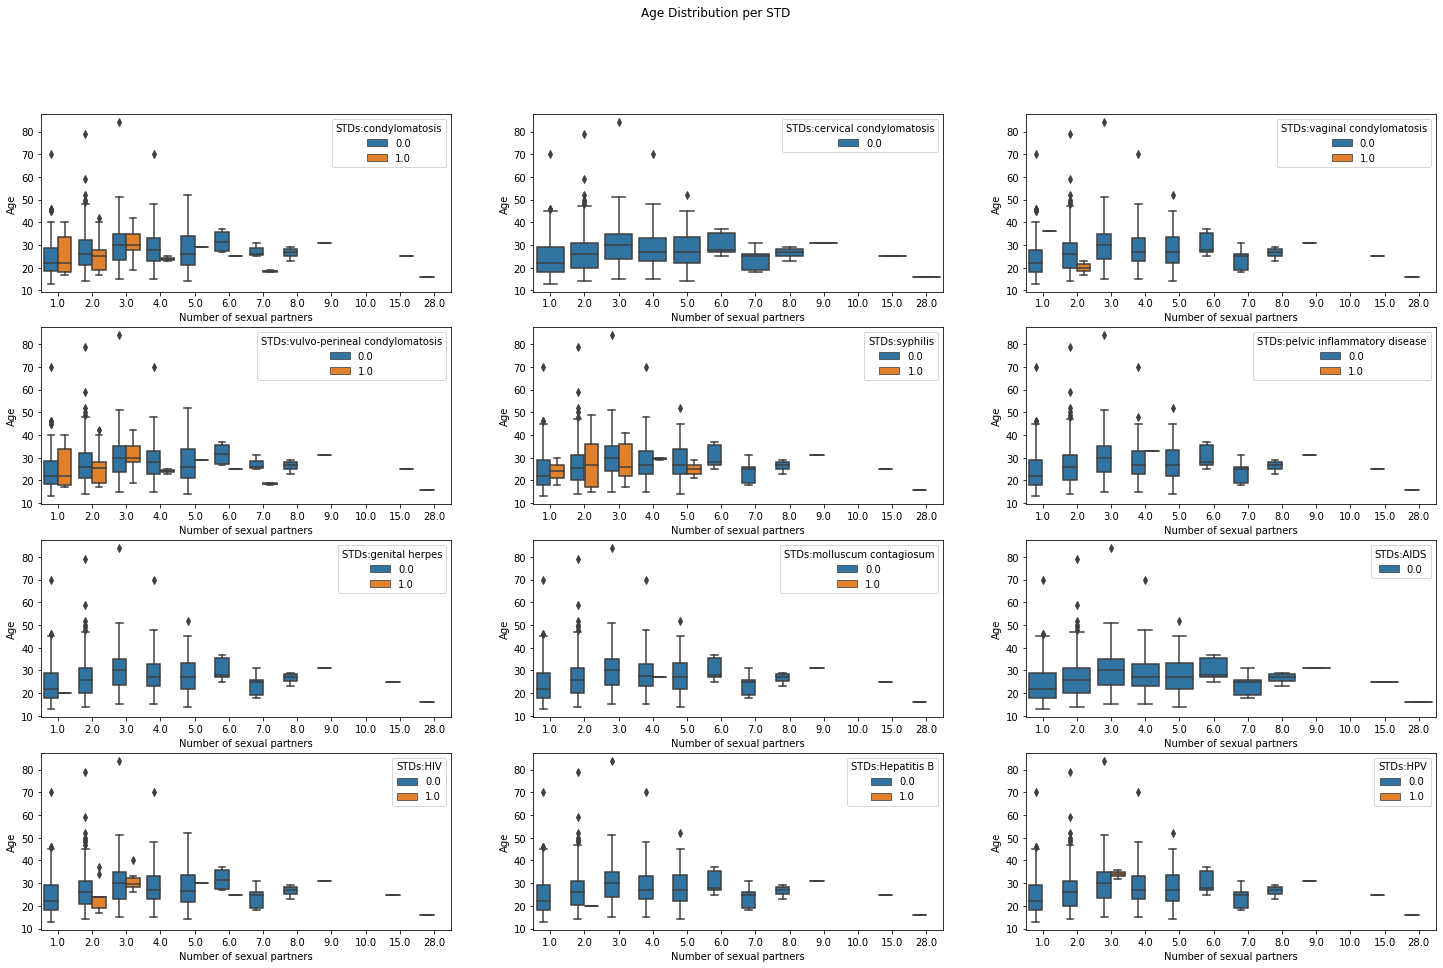

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(25, 15), sharey=False)
fig.suptitle('Age Distribution per STD')

for i in range(3):
    sns.boxplot(ax = axes[0][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+2], \
            data = std_df)

for i in range(3):
    sns.boxplot(ax = axes[1][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+5], \
            data = std_df)
    
for i in range(3):
    sns.boxplot(ax = axes[2][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+8], \
            data = std_df)
    
for i in range(3):
    sns.boxplot(ax = axes[3][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+11], \
            data = std_df)

plt.savefig('Age-distribution-per-STD.png', bbox_inches = 'tight')
plt.show()

### Imputation

For all 9 numerical features, we can divide tehm into two classes: sex-related and non sex-related. For non sex-related features, we can simply impute missing values with the mean of the column.

In [24]:
import warnings
warnings.filterwarnings("ignore")
nonsexual_num_cols = ['Age', \
            'STDs: Number of diagnosis',\
            'Smokes (years)', \
            'Smokes (packs/year)',\
            'Hormonal Contraceptives (years)',\
            'IUD (years)']
nonsexual_num_data = data[nonsexual_num_cols]
digits_num = {'First sexual intercourse': 0, \
              'Smokes (years)': 9, \
              'Smokes (packs/year)': 9,\
             'Number of sexual partners': 0,\
             'Num of pregnancies': 0,
             'Hormonal Contraceptives (years)': 9,\
             'IUD (years)': 2}
for column in list(nonsexual_num_data.columns[nonsexual_num_data.isnull().sum() > 0]):
    mean_val = nonsexual_num_data[column].mean()
    if digits_num[column] == 0:
        mean_val = int(mean_val)
    else:
        mean_val = round(mean_val, digits_num[column])
    nonsexual_num_data[column].fillna(mean_val, inplace=True)
if not list(nonsexual_num_data.columns[nonsexual_num_data.isnull().sum() > 0]):
    print("Already imported missing values for non sex-related numerical features")

Already imported missing values for non sex-related numerical features


For sex-related features, basically they are related to age so we impute missing values according to that person's age. In specific, 
1.Number of sexual partners can be positively related to age. 
2.The first sexual intercourse number can be negatively related to age, since with time people have started becoming sexually active much earlier.

In [25]:
sexual_num_cols = ['Number of sexual partners',\
          'First sexual intercourse', \
          'Num of pregnancies']
sexual_num_data = data[sexual_num_cols]
age_min, age_max = min(data['Age']), max(data['Age'])
# print(age_min, age_max)
for column in list(sexual_num_data.columns[sexual_num_data.isnull().sum() > 0]):
    col_min, col_max = min(data[column]), max(data[column])
    print(column, col_min, col_max)
    for i in range(858):
        if np.isnan(data[column][i]):
            age = data['Age'][i]
            data[column][i] = int((age-age_min)/(age_max-age_min)*(col_max-col_min) + col_min)
            # print(data[column][i])
if not list(sexual_num_data.columns[sexual_num_data.isnull().sum() > 0]):
    print("Already imported missing values for sex-related numerical features")

Number of sexual partners 1.0 28.0
First sexual intercourse 10.0 32.0
Num of pregnancies 0.0 11.0


###Numerical Features Visualisations

#### IUD (years) and Cervical Cancer

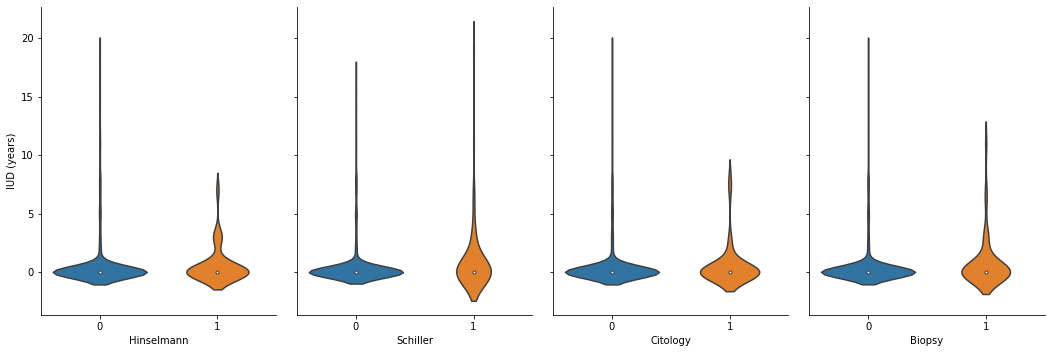

In [26]:
sns.PairGrid(data,
             y_vars=['IUD (years)'],
             x_vars= targets,
             aspect=.75,
             size=5).map(sns.violinplot);

#### Number of sexual partner, Age and Cervical Cancer

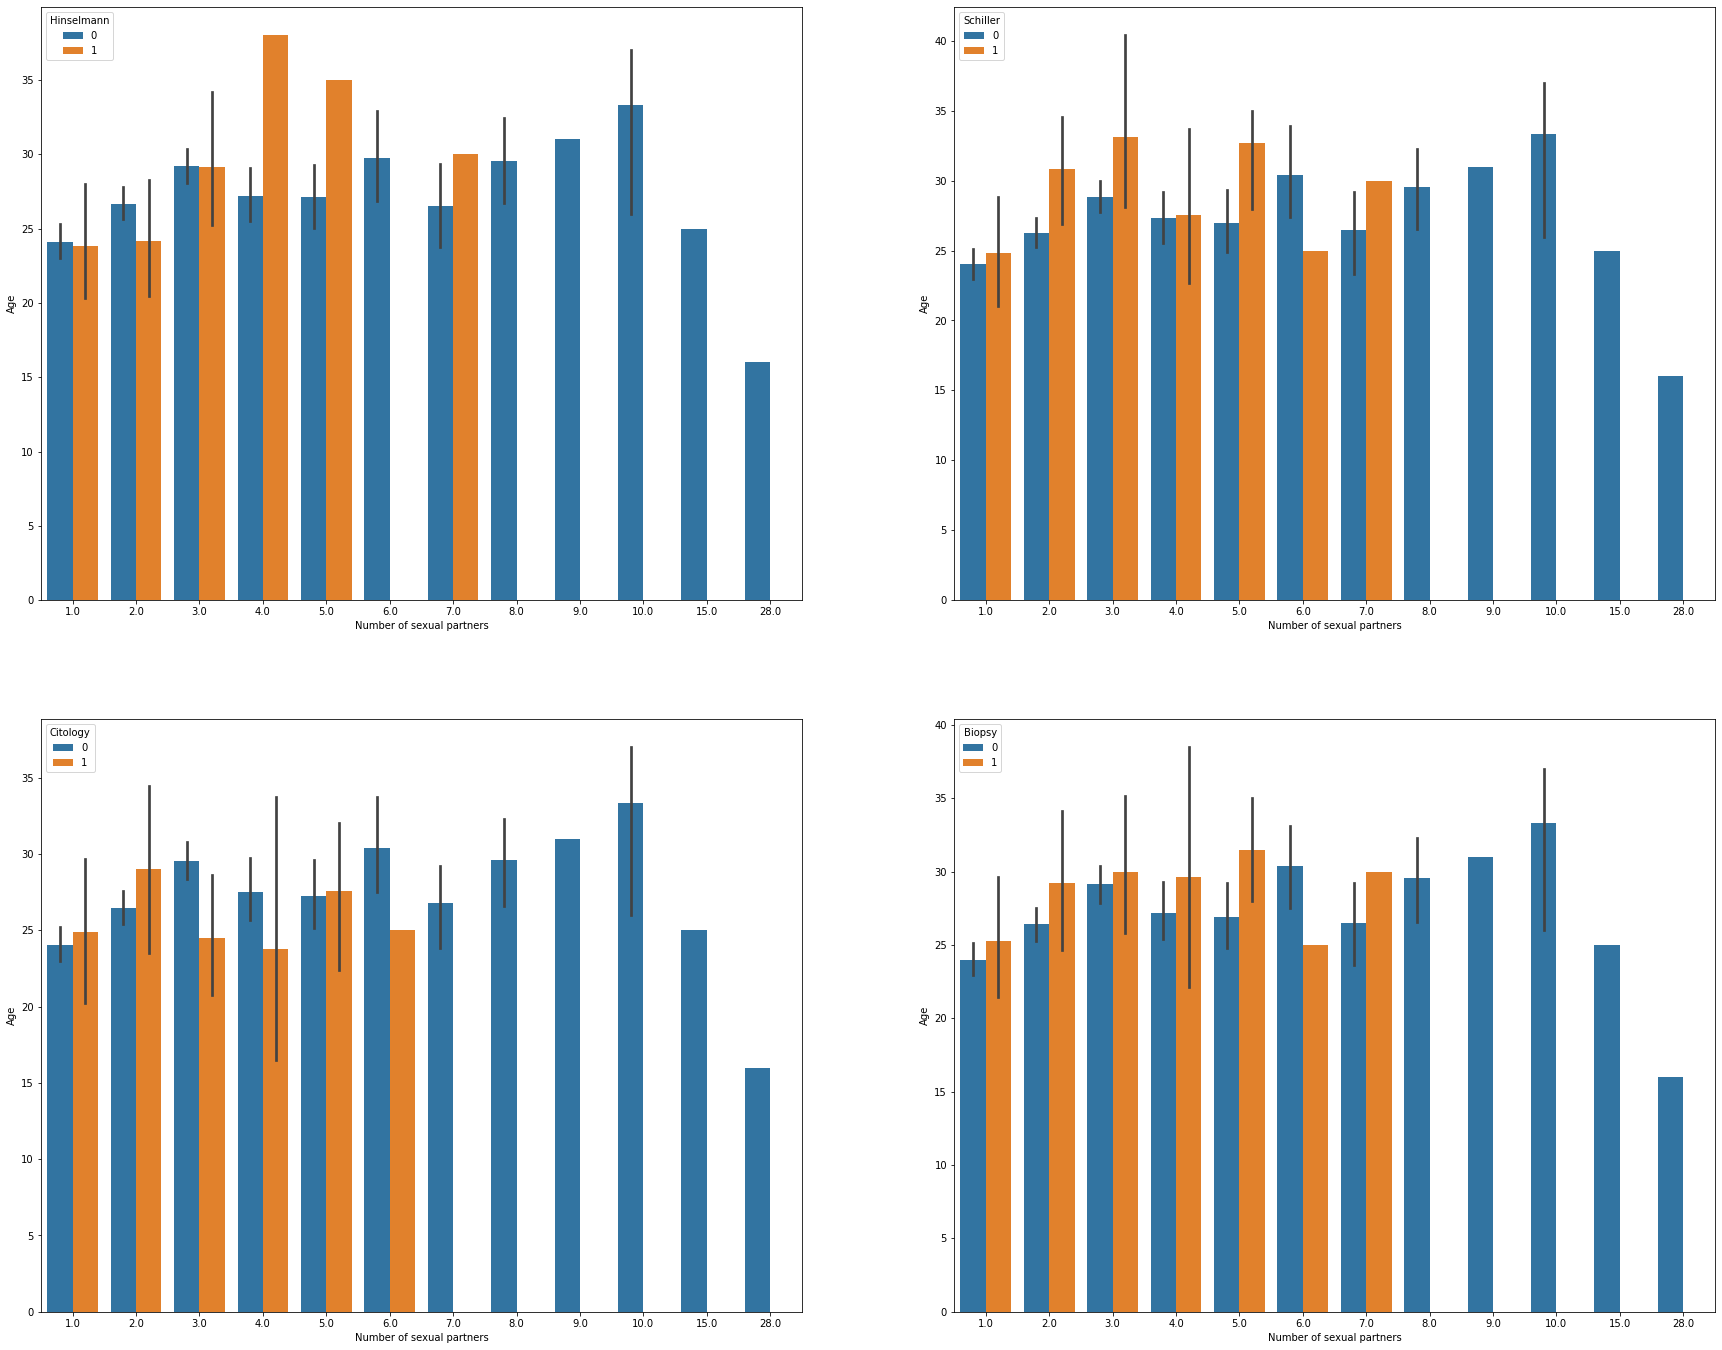

In [27]:
plt.figure(figsize=(30, 24))

for i, target in enumerate(targets):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Number of sexual partners', y='Age', hue=target, data=data)

The above visualization shows that there is no direct relationship between number of sexual partners and cancer incidence as the distribution of patients with and without cancer remains almost the same for every diagnostic test. It is intriguing that with the increase in number of sexual partners we saw absolutely no patients with cancer. Intuitively, one would think that higher number of sexual partners would mean a higher risk of contracting an STD which in-turn could lead to a higher risk of cervical cancer.

#### Age and Cervical Cancer

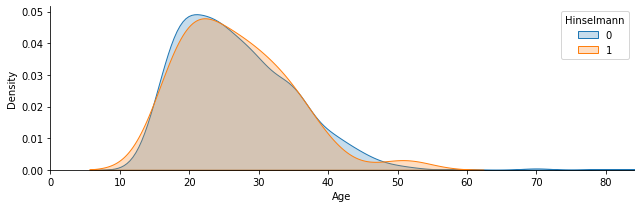

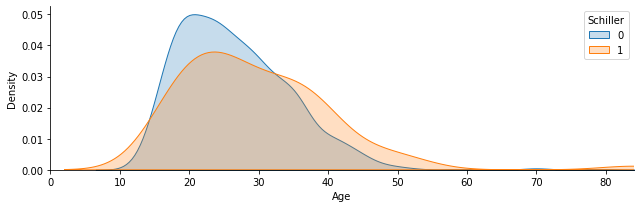

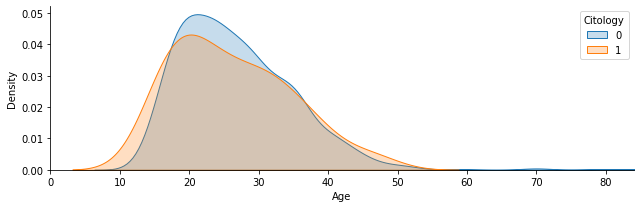

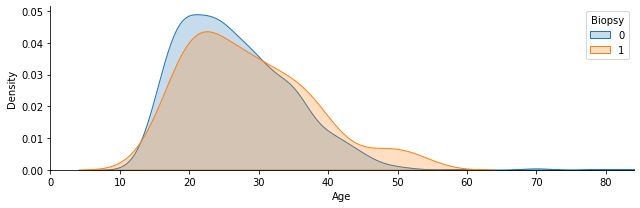

In [28]:
for target in targets:
  fig = sns.FacetGrid(data,hue=target,aspect=3,legend_out=False)
  fig.map(sns.kdeplot,'Age',shade=True)
  fig.set(xlim=(0,data['Age'].max()))
  fig.add_legend()

#### First sexual encounter and Cancer

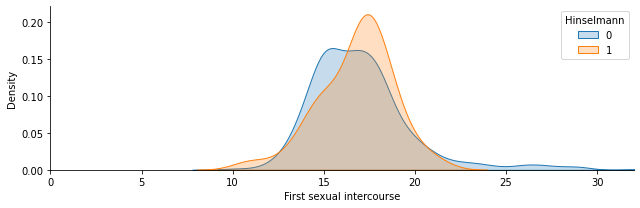

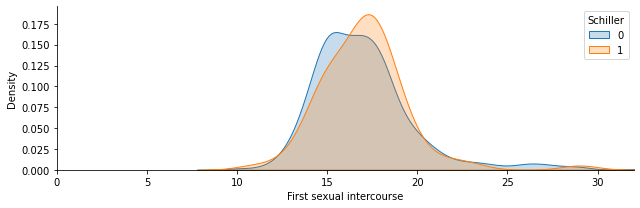

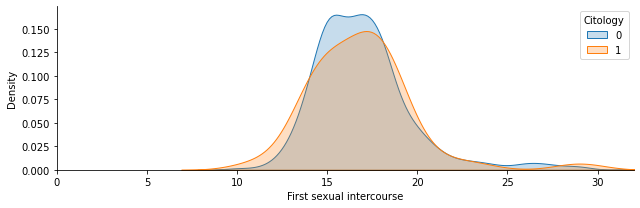

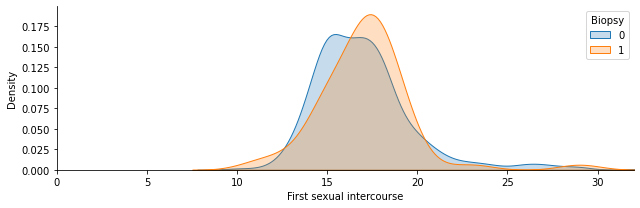

In [29]:
for target in targets:
  fig = sns.FacetGrid(data,hue=target,aspect=3,legend_out=False)
  fig.map(sns.kdeplot,'First sexual intercourse',shade=True)
  fig.set(xlim=(0,data['First sexual intercourse'].max()))
  fig.add_legend()

#### Hormonal Contraceptives, Dx:CIN and Cervical Cancer

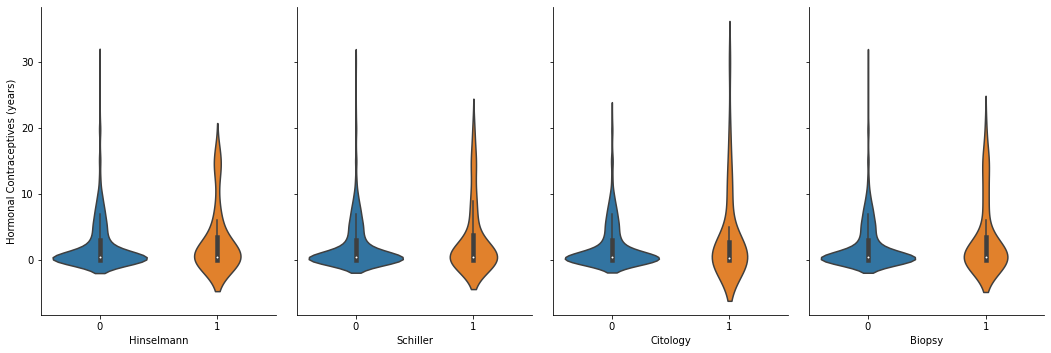

In [30]:
sns.PairGrid(data,
             y_vars=['Hormonal Contraceptives (years)'],
             x_vars= targets,
             aspect=.75,
             size=5).map(sns.violinplot)
plt.show()

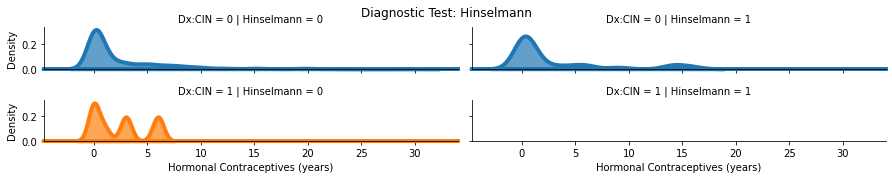

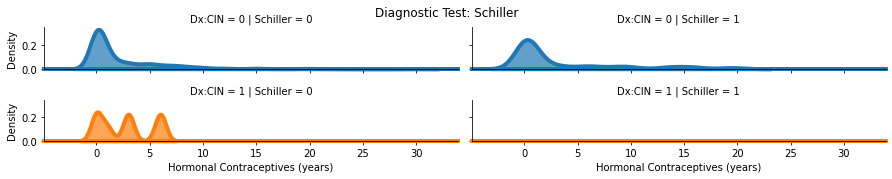

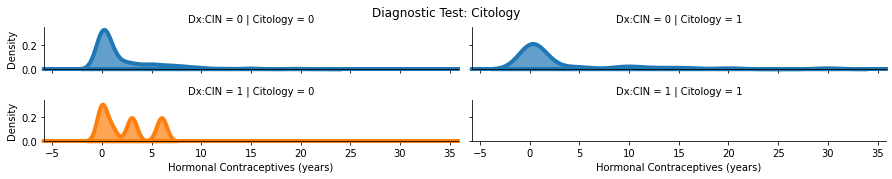

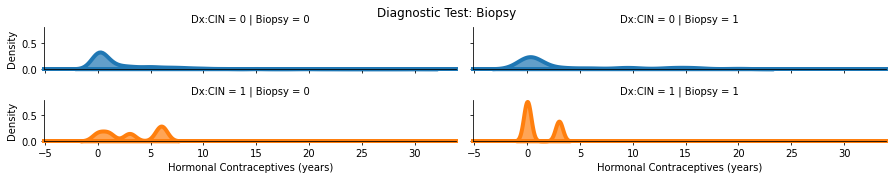

In [31]:
for t in targets:
  rp = sns.FacetGrid(data, col = t, row = 'Dx:CIN', hue="Dx:CIN", aspect=5, height = 1.25)
  
  rp.map(sns.kdeplot, 'Hormonal Contraceptives (years)', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
  rp.map(plt.axhline, y=0, lw=4, clip_on=False)
  rp.fig.suptitle('Diagnostic Test: {}'.format(t))
  plt.show()

#### Number of Pregnancies, Number of STDs and Cervical Cancer

From the below dot plot it is evident that the number of diagnosed STDs is not related to the number of pregnancies

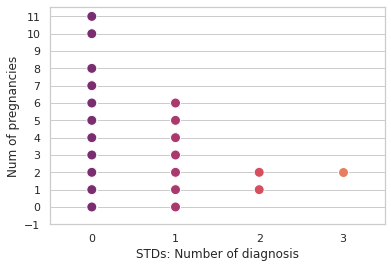

In [32]:
sns.set_theme(style="whitegrid")
g = sns.stripplot(y = 'Num of pregnancies', x = 'STDs: Number of diagnosis', data = data, size=10, orient="v", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")
plt.yticks(np.arange(-1,12,1))
plt.show()

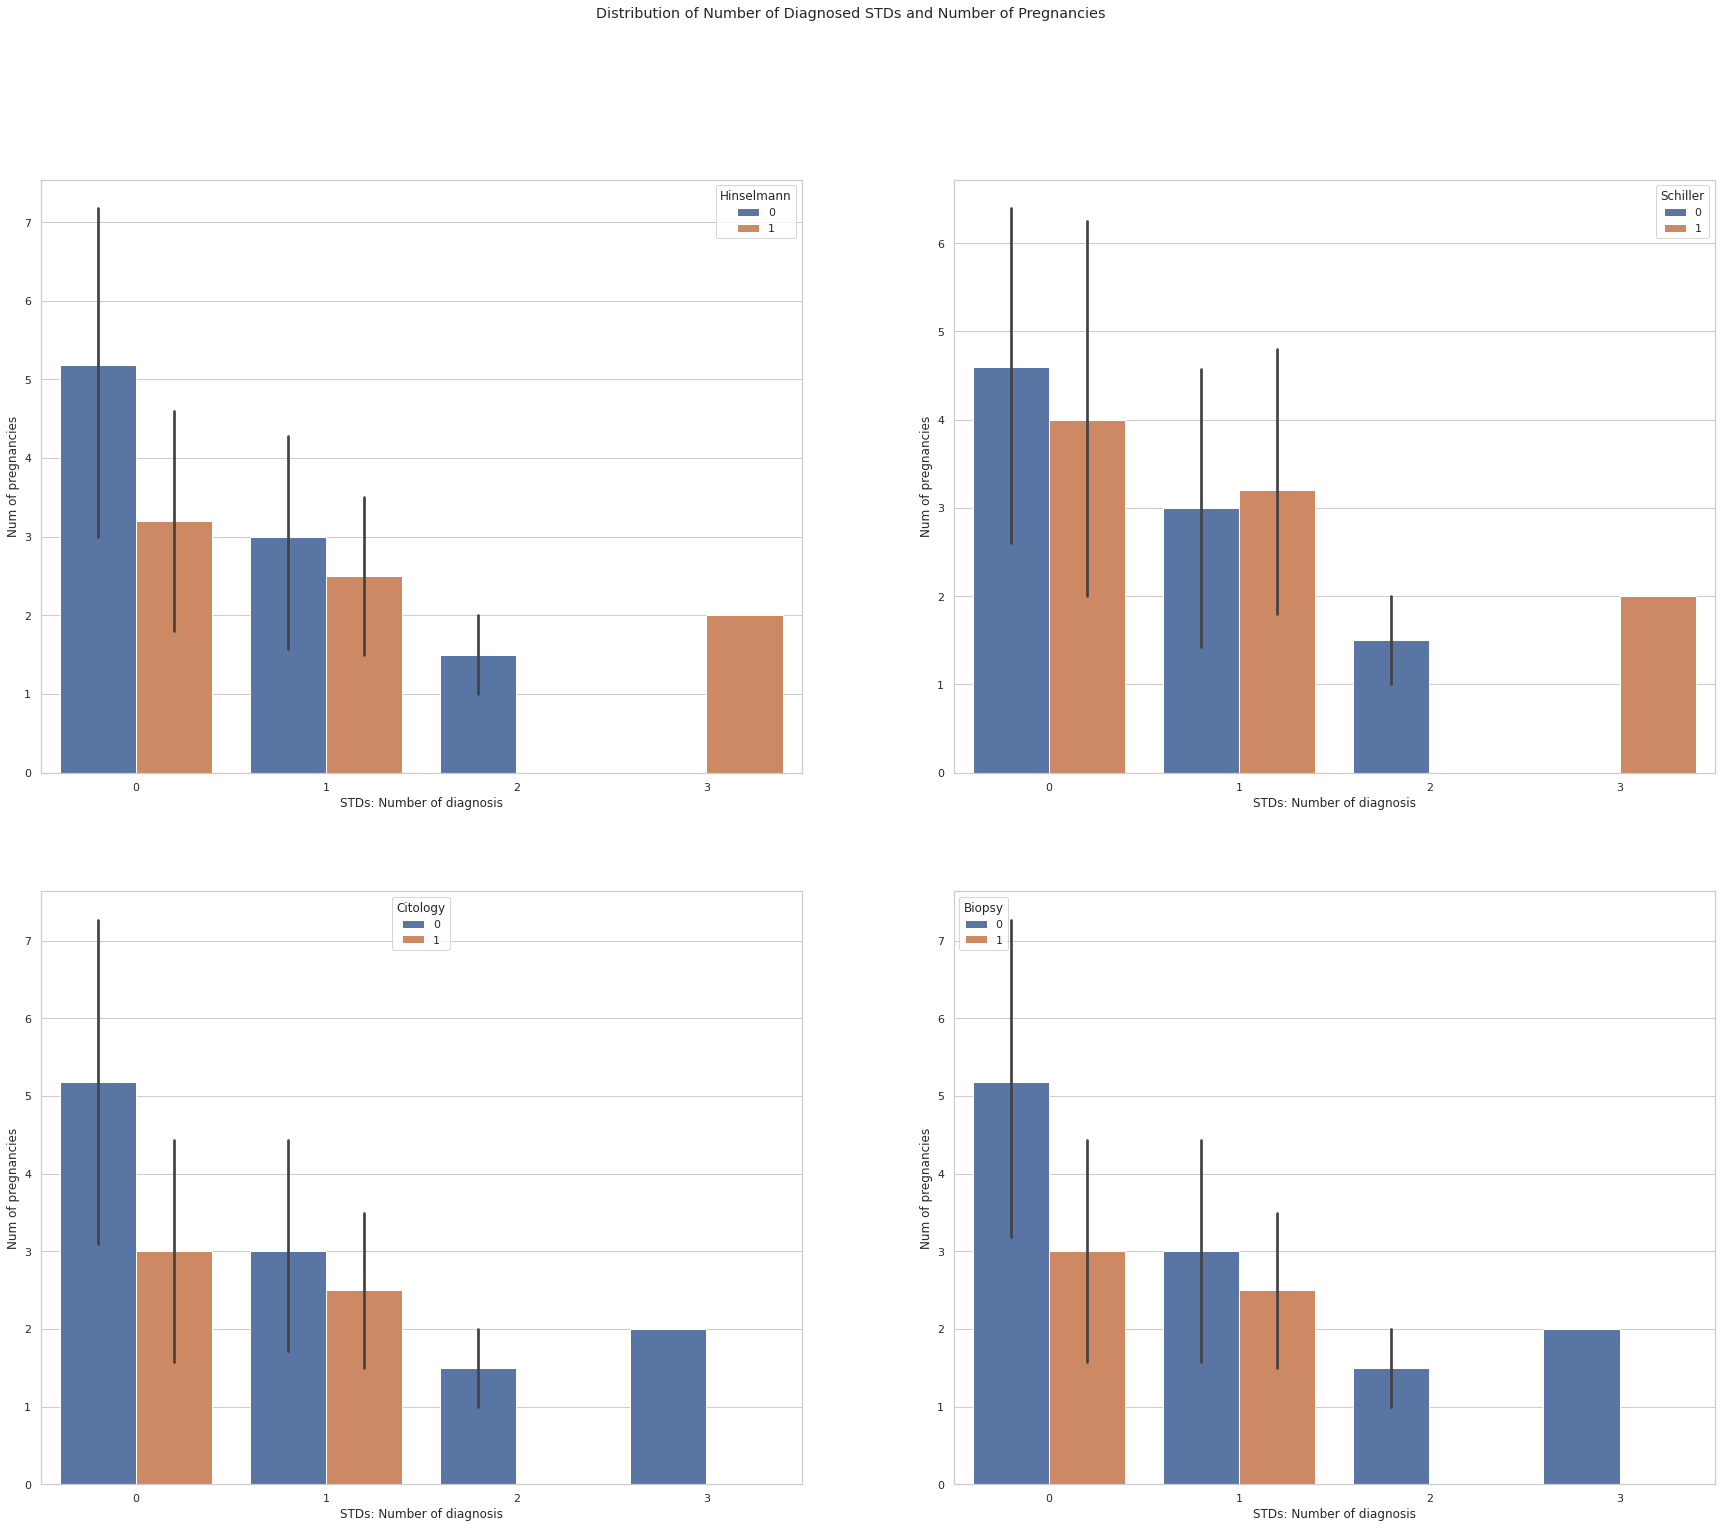

In [33]:
plt.figure(figsize=(30, 24))

for i, target in enumerate(targets):
    plt.subplot(2, 2, i+1)
    temp_df = data.groupby(['STDs: Number of diagnosis', 'Num of pregnancies', target]).size().reset_index(name = 'Count')
    sns.barplot(x='STDs: Number of diagnosis', y = 'Num of pregnancies', hue=target, data=temp_df)

plt.suptitle('Distribution of Number of Diagnosed STDs and Number of Pregnancies')
plt.show()

## Categorical Features

### Looking at the relationship between Smokes, Smokes (years) (and similar categories) for Imputation

In [34]:
assert data.loc[(data["Smokes (years)"] != 0.0) & (data["Smokes"] == "0.0")].empty
assert data.loc[(data["Hormonal Contraceptives (years)"] != 0.0) & (data["Hormonal Contraceptives"] == "0.0")].empty
assert data.loc[(data["IUD (years)"] != 0.0) & (data["IUD"] == "0.0")].empty
assert data.loc[(data["STDs (number)"] != 0.0) & (data["STDs"] == "0.0")].empty

As you can see, there are no instances in which Smokes is false but Smokes (years) is a number other than 0. Hence, we can remove Smokes, Hormonal Contraceptives, IUD, and STDs.

In [35]:
data.drop(columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs'], inplace = True)

### Getting new set of categorical values

In [36]:
newdf = data.select_dtypes(include=numerics)
numerical_columns = list(newdf.columns)

categorical_cols = []
for c in list(data.columns):
    if c not in numerical_columns:
        categorical_cols.append(c)
        
categorical_cols

['STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV']

### Imputing missing categorical values

In [37]:
cat_maj = []
impute_by_0 = []
for c in categorical_cols:
  perc = data[c].value_counts(normalize=True)[0] * 100
  cat_maj.append((c, perc))
  if perc > 98:
    impute_by_0.append(c)
cat_maj.sort(key=lambda x: x[1], reverse=True)
cat_maj

[('STDs:cervical condylomatosis', 100.0),
 ('STDs:AIDS', 100.0),
 ('STDs:pelvic inflammatory disease', 99.867197875166),
 ('STDs:genital herpes', 99.867197875166),
 ('STDs:molluscum contagiosum', 99.867197875166),
 ('STDs:Hepatitis B', 99.867197875166),
 ('STDs:HPV', 99.734395750332),
 ('STDs:vaginal condylomatosis', 99.46879150066401),
 ('STDs:syphilis', 97.60956175298804),
 ('STDs:HIV', 97.60956175298804),
 ('STDs:vulvo-perineal condylomatosis', 94.28950863213812),
 ('STDs:condylomatosis', 94.15670650730412)]

As it's evident, all of the categories have a clear majority. The majority value is 0. For cervical condylomatosis, vaginal condylomatosis, pelvic inflammatory disease, genital herpes, molluscum contagiosum, AIDS, Hepatitis B, HPV, more than 98% of the values are 0. Hence, imputing missing values with 0 for these categories is suitable.

In [38]:
data.update(data[impute_by_0].fillna(0))

For other categorical variables, we elected to do knn imputation with k = 30.

In [39]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=30)
data = pd.DataFrame(np.round(imputer.fit_transform(data)),columns = data.columns)

The visualizations above depict that women between age 20 to 35 are facing the highest risk of developing cervical cancer. There is a slight peak at the age of 50 as well.

From the above visualizations it is pretty evident that women who became sexually active between the ages of 15 and 20 have the highest risk of developing cervical cancer.

### Categorical Features Visualization

#### Focus on HPV infection and cancer incidence

In [40]:
std_hpv = data[['STDs:HPV']+data_y.columns.to_list()].copy()
std_hpv.dropna(inplace = True)
std_hpv['STDs:HPV'] = pd.to_numeric(std_hpv['STDs:HPV'], errors='coerce')

std_hpv_biopsy = std_hpv[['STDs:HPV','Biopsy']].groupby(['STDs:HPV','Biopsy']).size().reset_index(name = 'Count')
std_hpv_hinselmann = std_hpv[['STDs:HPV','Hinselmann']].groupby(['STDs:HPV','Hinselmann']).size().reset_index(\
                                                                                        name = 'Count')
std_hpv_schiller = std_hpv[['STDs:HPV','Schiller']].groupby(['STDs:HPV','Schiller']).size().reset_index(\
                                                                                            name = 'Count')
std_hpv_citology = std_hpv[['STDs:HPV','Citology']].groupby(['STDs:HPV','Citology']).size().reset_index(\
                                                                                                name = 'Count')

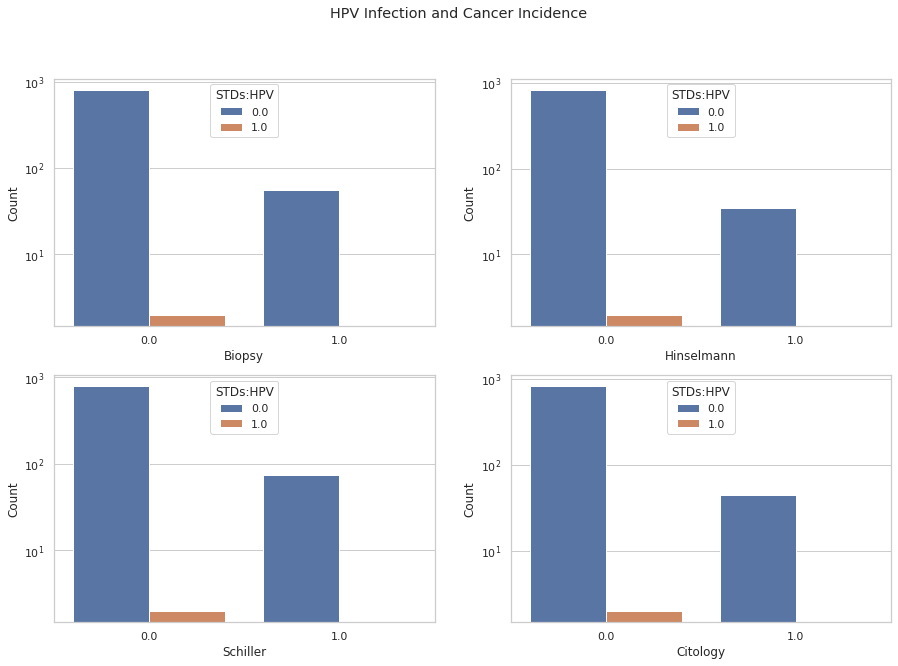

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
fig.suptitle('HPV Infection and Cancer Incidence')

for i in range(2):
  for j in range(2):
    axes[i][j].set_yscale('log')
sns.barplot(ax = axes[0][0], x = 'Biopsy', y = 'Count', hue = 'STDs:HPV', data = std_hpv_biopsy)
sns.barplot(ax = axes[0][1], x = 'Hinselmann', y = 'Count', hue = 'STDs:HPV', data = std_hpv_hinselmann)
sns.barplot(ax = axes[1][0], x = 'Schiller', y = 'Count', hue = 'STDs:HPV', data = std_hpv_schiller)
sns.barplot(ax = axes[1][1], x = 'Citology', y = 'Count', hue = 'STDs:HPV', data = std_hpv_citology)

plt.savefig('HPV-infection-cancer-incidence.png', bbox_inches = 'tight')
plt.show()

#### Other STDs and Cervical Cancer

In [42]:
target_cols = ['STDs:condylomatosis',\
 'STDs:cervical condylomatosis',\
 'STDs:vaginal condylomatosis',\
 'STDs:vulvo-perineal condylomatosis',\
 'STDs:syphilis',\
 'STDs:pelvic inflammatory disease',\
 'STDs:genital herpes',\
 'STDs:molluscum contagiosum',\
 'STDs:AIDS',\
 'STDs:HIV',\
 'STDs:Hepatitis B',\
 'Dx:CIN',\
 'Hinselmann',\
 'Biopsy',\
 'Citology',\
 'Schiller']
target_data = data[target_cols]
# target_data.head()

In [43]:
df = target_data[['STDs:HIV','Biopsy']]
df = df.groupby(['STDs:HIV','Biopsy']).size().reset_index(name = 'Count')
df = df[['Count','STDs:HIV','Biopsy']]

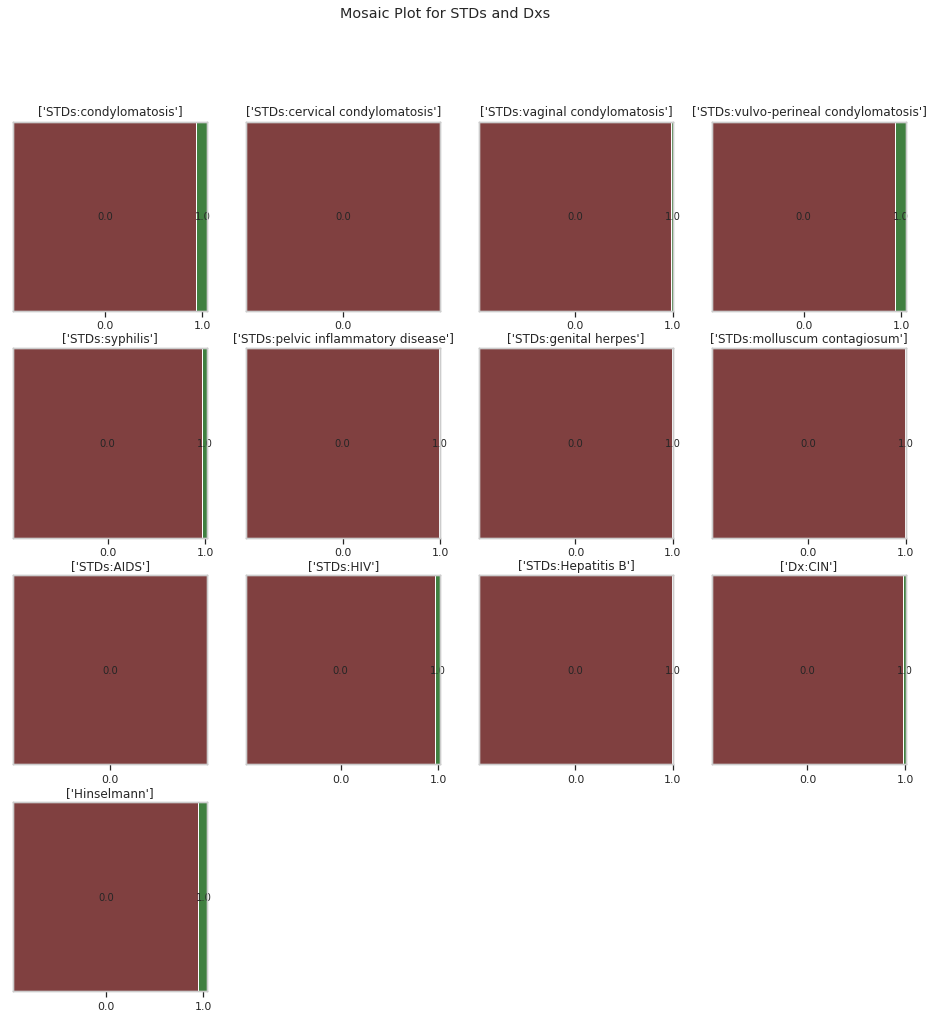

In [44]:
from statsmodels.graphics.mosaicplot import mosaic
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
fig.suptitle('Mosaic Plot for STDs and Dxs')
for i in range(13):
  tmp_col = [target_cols[i], ]
  tmp_data = data[tmp_col]
  mosaic(data=tmp_data, index=tmp_col, ax=axes[i//4][i%4])
  axes[i//4][i%4].set_title(tmp_col)
for i in range(13, 16):
  fig.delaxes(axes[i//4][i%4])

As you can tell from the mosaic plots above, these categories all 
have a clear majority. The majority value is 0.

In [45]:
# for target in targets:
#   fig = sns.FacetGrid(data,hue=target,aspect=3,legend_out=False)
#   fig.map(sns.kdeplot,'Num of pregnancies',shade=True)
#   fig.set(xlim=(0,data['Num of pregnancies'].max()))
#   fig.add_legend()

In [46]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
# for i in range(2):
#     for j in range(2):
#         sns.scatterplot(x='First sexual intercourse',hue=targets[i+j],y='Num of pregnancies',data=data, ax=axes[i][j])

# Data Sampling

In [47]:
targets

['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

In [48]:
for target in targets:
  print(data[target].value_counts())

0.0    823
1.0     35
Name: Hinselmann, dtype: int64
0.0    784
1.0     74
Name: Schiller, dtype: int64
0.0    814
1.0     44
Name: Citology, dtype: int64
0.0    803
1.0     55
Name: Biopsy, dtype: int64


As you can see, the data is highly imbalanced for all 4 of our targets. So, we will use SMOTE to balance the data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [50]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [51]:
# We have 4 different target variables, so creating 4 different data splits for training
# First performing SMOTE

In [52]:
X = data
y = data[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]

X = X.drop(columns=['Hinselmann', 'Schiller', 'Citology', 'Biopsy'])

In [53]:
# Splitting into 60% training, 20% val, 20% test

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)

In [54]:
# Splitting the four target classes, as cannot perform SMOTE on multiclass 
print(y_train.columns)

# Hinselman
y_train_hl = y_train['Hinselmann']
y_test_hl = y_test['Hinselmann']
y_val_hl = y_val['Hinselmann']

# Schiller
y_train_sc = y_train['Schiller']
y_test_sc = y_test['Schiller']
y_val_sc = y_val['Schiller']

# Citology
y_train_ct = y_train['Citology']
y_test_ct = y_test['Citology']
y_val_ct = y_val['Citology']

# Biopsy
y_train_bp = y_train['Biopsy']
y_test_bp = y_test['Biopsy']
y_val_bp = y_val['Biopsy']

Index(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], dtype='object')


In [55]:
# Using SMOTE to balance the data
smote = SMOTE(random_state=42)

In [56]:
# For Hinselman
X_train_smote, y_train_hl_smote = smote.fit_resample(X_train, y_train_hl)

In [57]:
# Shape of development and test features
print("Shape of training features: ", X_train.shape)
print("Shape of smote training features: ", X_train_smote.shape)

# Number of positive and negative labels in smote development set
print("Hinselman Positive labels (class 1) count: ", y_train_hl_smote.value_counts()[1])
print("Hinselman Negative labels (class 0) count: ", y_train_hl_smote.value_counts()[0])

Shape of training features:  (514, 26)
Shape of smote training features:  (990, 26)
Hinselman Positive labels (class 1) count:  495
Hinselman Negative labels (class 0) count:  495


## Scaling

In [58]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = X_train.select_dtypes(include=numerics)
numerical_cols = list(df.columns)

non_numeric_cols = []
for c in list(X_train.columns):
    if c not in numerical_cols:
        non_numeric_cols.append(c)

print('Numerical features = \n{}'.format(numerical_cols))
print('\nCategorical features = \n{}'.format(non_numeric_cols))

Numerical features = 
['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']

Categorical features = 
[]


In [59]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

preprocess = make_column_transformer((StandardScaler(), np.array(numerical_cols)))

# Model Training

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
# Using Random Forest for Hinselman
random_forest_pipe = make_pipeline(preprocess, RandomForestClassifier())
random_forest_pipe.fit(X_train_smote, y_train_hl_smote)

print("Hinselman: Random Forests Train Accuracy: ", random_forest_pipe.score(X_train_smote, y_train_hl_smote))

Hinselman: Random Forests Train Accuracy:  0.997979797979798


In [62]:
# Doing hyperparameter tuning
rf_param_grid = {"n_estimators": [75, 90, 100, 125, 150], "max_depth": [6, 8, 10, 12, 14]}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_param_grid)
grid_search_rf.fit(preprocess.transform(X_train_smote), y_train_hl_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'n_estimators': [75, 90, 100, 125, 150]})

In [64]:
print("Random Forest Train Set Accuracy: ", grid_search_rf.score(preprocess.transform(X_train_smote), y_train_hl_smote))
print("Random Forest Test Set Accuracy: ", grid_search_rf.score(preprocess.transform(X_test), y_test_hl))
print("Best Params: ", grid_search_rf.best_params_)

Random Forest Train Set Accuracy:  0.997979797979798
Random Forest Test Set Accuracy:  0.9418604651162791
Best Params:  {'max_depth': 14, 'n_estimators': 150}
